In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from scipy.cluster.hierarchy import linkage, dendrogram
from scipy.cluster.vq import vq, kmeans, kmeans2, whiten

%matplotlib inline

In [2]:
def convert_to_float(value):
    """
    Преобразование значений в столбцах датафрейма;
    :param value: float
    :return: float
    """
    value = str(value)
    value = value.replace(",", ".")
    value = round(float(value), 2)
    return value

#######################################################################################################################

In [3]:
# Загрузка датафрейма из CSV файла;
textiles = pd.read_csv('../data/textiles.csv', sep=';')

# Приведение типов колонок датафрейма к значению с плавающей запятой;
textiles['warp_a'] = textiles.warp_a.apply(convert_to_float)
textiles['warp_b'] = textiles.warp_b.apply(convert_to_float)
textiles['weft_a'] = textiles.weft_a.apply(convert_to_float)
textiles['weft_b'] = textiles.weft_b.apply(convert_to_float)
textiles['warp_thick_mean'] = textiles.warp_thick_mean.apply(convert_to_float)
textiles['weft_mean'] = textiles.weft_mean.apply(convert_to_float)

# Вычисление "усредненных" толщин нитей;
textiles['warp_nominal'] = round((textiles['warp_a'] + textiles['warp_b']) / 2, 2)
textiles['weft_nominal'] = round((textiles['weft_a'] + textiles['weft_b']) / 2, 2)

In [19]:
threads_whitened = whiten(list(zip(textiles['warp_thick_mean'].tolist(), textiles['weft_mean'].tolist(), textiles['warp_nominal'].tolist(), textiles['weft_nominal'].tolist())))
threads = list(zip(textiles['warp_nominal'].tolist(), textiles['weft_nominal'].tolist()))
threads_centroids, threads_labels = kmeans2(threads, 4)\

In [20]:
textiles['threads_labels'] = threads_labels

In [23]:
cluster_1 = textiles[textiles['threads_labels'] == 0]
cluster_2 = textiles[textiles['threads_labels'] == 1]
cluster_3 = textiles[textiles['threads_labels'] == 2]

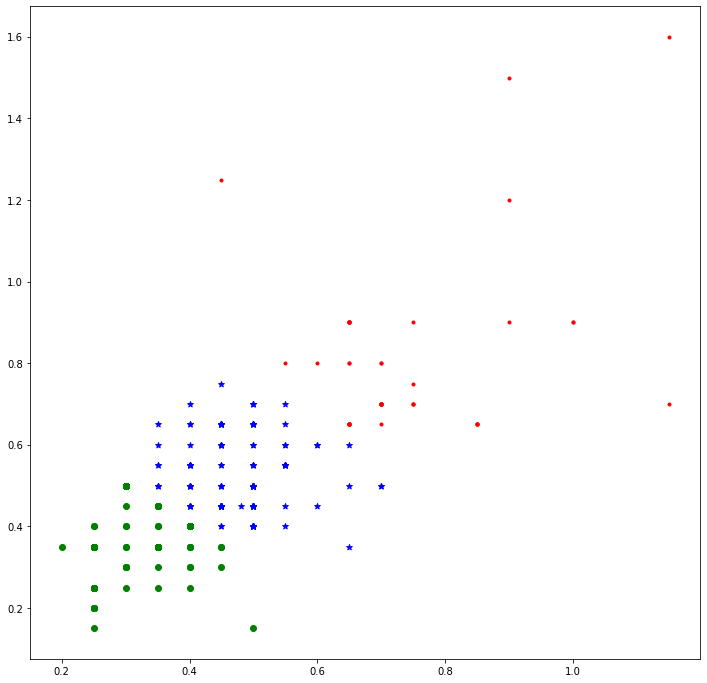

In [33]:
fig, ax = plt.subplots(figsize=(12, 12))

ax.scatter(cluster_1['warp_nominal'].tolist(), cluster_1['weft_nominal'].tolist(), marker='*', color='blue')
ax.scatter(cluster_2['warp_nominal'].tolist(), cluster_2['weft_nominal'].tolist(), marker='o', color='green')
ax.scatter(cluster_3['warp_nominal'].tolist(), cluster_3['weft_nominal'].tolist(), marker='.', color='red')

plt.show()

In [34]:
print(len(cluster_1))
print(len(cluster_2))
print(len(cluster_3))

169
87
45


In [18]:
print(cluster_1)

     order grave  add    z  internal_storage  number  warp_size  weft_size  \
22    22.0    95  0.0  1.0     2007-0050-010     NaN        100         90   
74    70.0   159  0.0  1.0   2008-001-003-04     NaN        220        360   
118  107.0   173  0.0  1.0  2008-0031-003-10     NaN         70         55   
228    NaN   200  0.0  1.0     2008-0118-005     NaN        180         40   

        type  item_no  ... warp_b warp_thick_mean weft_a weft_b weft_mean  \
22    fabric        0  ...    1.3            0.90    1.0    2.0       1.5   
74    fabric        3  ...    0.6            0.55    0.6    8.0       4.3   
118  textile        0  ...    0.8            0.65    1.5    2.5       2.0   
228  textile        0  ...    1.5            1.15    1.2    2.0       1.6   

    warp_dens weft_dens warp_nominal weft_nominal threads_labels  
22       10.0       5.0         0.90          1.5              0  
74       30.0       8.0         0.55          4.3              0  
118      12.0       5.